# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [5]:
#Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Upload the dataset
leadsData=pd.read_csv("ExtraaLearn.csv")

## Data Overview

- Observations
- Sanity checks

In [7]:
#Info about Data structure
leadsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Data Structure**
*   There are a total of 4612 observations in the dataset
*   There are 14 independent features to explain the final conversion status of the leads.
*   Out of 14 independent features, 4 are numerical and rest are categorical features
*  There are no missing values in the dataset



In [8]:
#Get statistical summary of the dataset
leadsData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Summary of the numerical features**

*   Median age of customers is 51, youngest being 18 and oldest being 63
*   Number of website visits vary between 0 and 30, with a mean/median of 3 website visits
*   Average time spent on website is 724 minutes but the median is 376, implying distribution could be right skewed.
*  Number of page views per visit vary between 0 and 18, with an average of 3 pages per visit
* Just looking at the dataset, it can be interpreted that average conversion rate for customers is 30%



In [9]:
#Get summary of the categorical features
leadsData.describe(exclude=np.number).T

,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


**Summary of the categorical features**
*   Most of the customers are working professionals, with count of 2616 among 4612 total customers
*   Most of the customers interacted via ExtraaLearn website
*   Most of the customers completed their profiles
*   Majority of the leads didn't see the ad through newspaper or magazine or digital media or educational channels
* Majority of the leads also didnt have any referrals




In [10]:
#Get a sample of the data
leadsData.sample(n=10)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4215,EXT4216,56,Professional,Website,High,2,73,2.123,Website Activity,No,No,No,No,No,1
2393,EXT2394,58,Professional,Website,Low,8,531,1.873,Phone Activity,No,No,No,No,No,0
330,EXT331,51,Professional,Mobile App,Medium,3,284,0.345,Website Activity,No,No,No,Yes,No,0
3286,EXT3287,58,Professional,Website,High,9,1596,2.197,Website Activity,No,No,No,No,No,1
3329,EXT3330,21,Student,Website,High,8,206,7.504,Phone Activity,No,No,Yes,No,No,0
3046,EXT3047,21,Student,Mobile App,Medium,1,548,2.821,Phone Activity,No,No,Yes,No,No,0
1503,EXT1504,46,Professional,Mobile App,Medium,7,348,0.278,Email Activity,Yes,No,No,Yes,No,0
1265,EXT1266,57,Professional,Website,Medium,1,688,2.192,Email Activity,Yes,No,Yes,No,No,1
2413,EXT2414,52,Unemployed,Mobile App,Medium,1,283,5.194,Website Activity,No,No,No,No,No,0
4517,EXT4518,58,Professional,Mobile App,High,4,357,2.858,Website Activity,No,No,No,No,No,0


In [11]:
#Look for duplicates
leadsData.duplicated().sum()

0

There are no duplicates in the dataset

In [12]:
#Drop the ids, as it does not have any explanatory power
leadsData.drop(['ID'], axis=1,inplace=True)

In [13]:
#Get proportions/percentage distributions for categorical variables which take more than 2 values
categorical_vars=['current_occupation','profile_completed','last_activity']
for category in categorical_vars:
  print(leadsData[category].value_counts(1))
  print('************')

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
************


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

# **Univariate Analysis**

**Continuous Features**

In [14]:
#Plot Histogram and boxplot together for continuous features
def histogram_boxplot(data, feature, kde=True):
  fig, (ax1, ax2)=plt.subplots(2,sharex=True,height_ratios=(0.25,0.75))

  #Boxplot
  sbn.boxplot(data, x=feature, color='violet', ax=ax1,showmeans=True)

  #Histogram
  sbn.histplot(data,x=feature,kde=kde, ax=ax2)

  #Show mean and median in histogram
  ax2.axvline(data[feature].mean(),color='green', linestyle='--')
  ax2.axvline(data[feature].median(), color='black', linestyle='--')

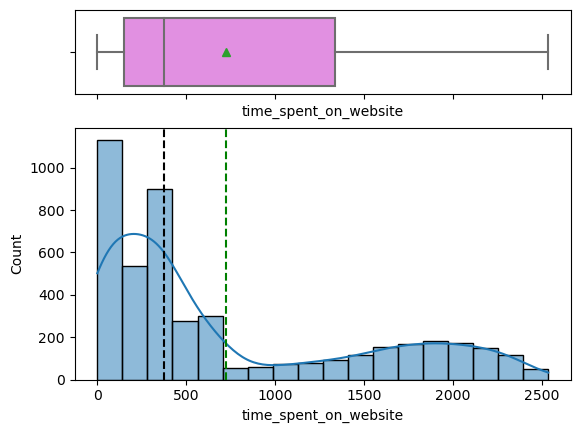

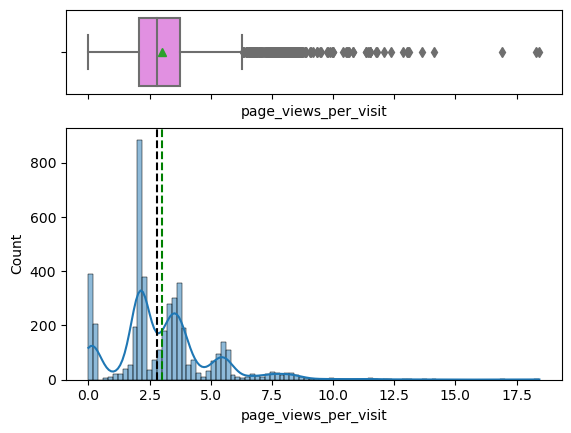

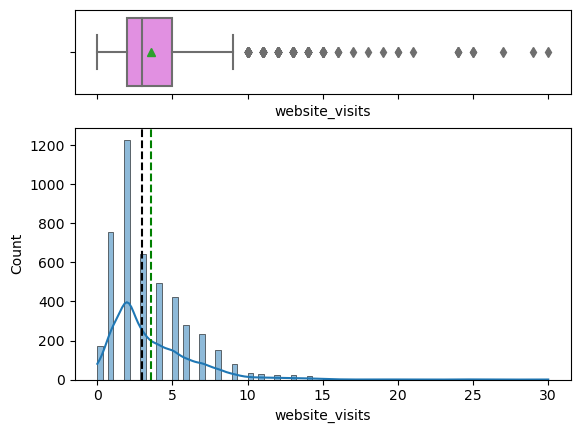

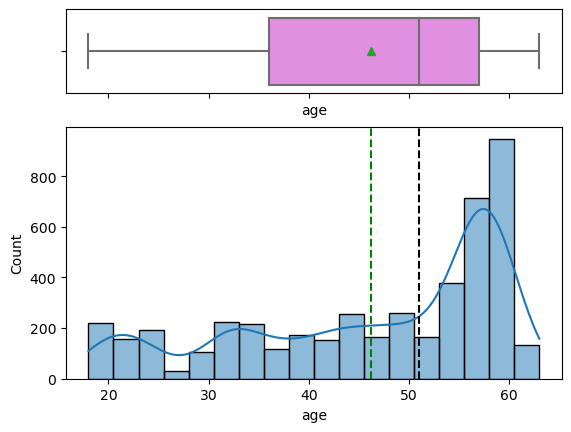

In [15]:
#Plot histogram and boxplots for numerical and continous features
num_features=['time_spent_on_website','page_views_per_visit','website_visits','age']
for feature in num_features:
 histogram_boxplot(leadsData,feature, kde=True)



**Univariate Observations - I (Continuous Features)**
* Time spent on websites is slightly right skewed
* Page views per visit seems to be a multi-modal distribution with many outliers and highly right skewed, means few leads could be scrolling through many sections/pages of the website
* Age of the leads is left skewed with a median of around 50 years

**Categorical Features**

In [16]:
#Get proportions/percentage distributions for categorical variables
categorical_features=leadsData.select_dtypes(include=['object','category']).columns.to_list()
for category in categorical_features:
  print(leadsData[category].value_counts(1))
  print('************************')

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
************************
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
************************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
************************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
************************
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
************************
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
************************
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
************************
educational_channels
No     0.847138
Yes    0.152862
Name: proportion, dtype: float64
************************
refer

**Univariate Observations - II (Categorical Features)**
*   Around 56% of the leads are professionals, followed by 31% of unemployed and only 12% of the students
*   Most of the clients first interacted through website though a high number of leads also used mobile app (44%)
*  Almost 50% of the leads complete their profile to a high degree and others completed to a medium degree. Very few leads completed their profile to a low degree
* Almost 50% of the last interactions between leads and ExtraaLearn has been through emails  
* Majority of the leads (~ >= 85%) of the leads didnt find about ExtraaLearn through print media (Type I and Type II), digital media or educational channels.
* Majority (97%) of the leads had no referrals



# Bivariate Analysis

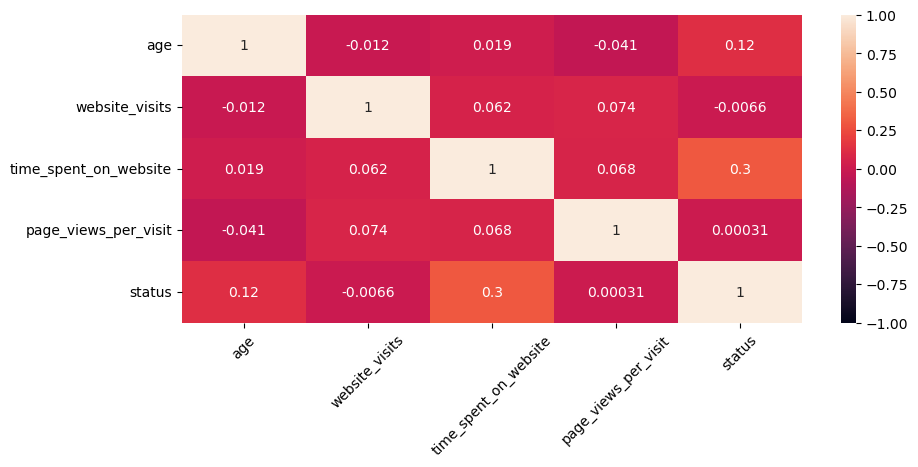

In [17]:
#Create heatmap to check correlation between continuous variables
plt.figure(figsize=(10,4))
sbn.heatmap(data=leadsData[['age','website_visits','time_spent_on_website','page_views_per_visit', 'status']].corr(), annot=True, vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.show()




*   As observed from the heatmap, there is not any significant correation amongst the predictors
*   Out of all the predictors, time spent on the website and age has some impact on converting the leads (status)



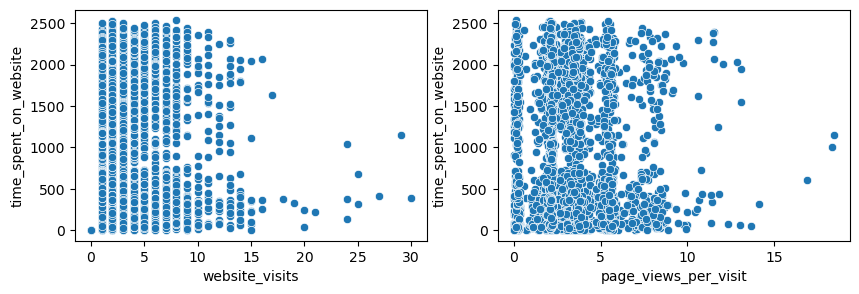

In [18]:
#Check correlation between time spent vs. page views and time spent vs number of visits
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(10,3))
sbn.scatterplot(data=leadsData, y='time_spent_on_website', x='website_visits', ax=ax1)
sbn.scatterplot(data=leadsData, y='time_spent_on_website', x='page_views_per_visit', ax=ax2)
plt.show()

From the scatter plots, there does not seem to be correlation between number of website visits and page views per visit with the time spend on website. It implies a lead could be spending more time on website even within a single visit and also could be spending more time on certain pages

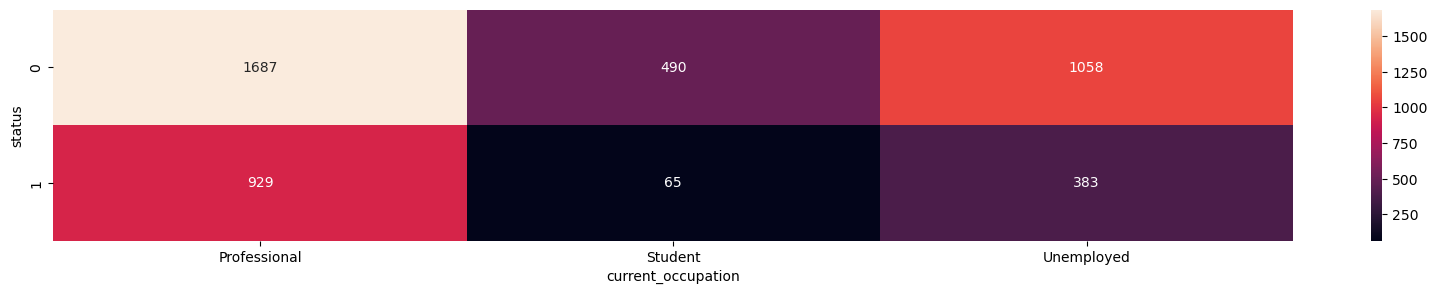

In [19]:
#Converts by Current Occupation
plt.figure(figsize=(20,3))
sbn.heatmap(pd.crosstab(index=leadsData['status'],columns=leadsData['current_occupation']), annot=True,fmt=".5g")
plt.show()

As observed from the heatmap above, majority of the converts are from working professionals followed by unemployed leads. This is consistent with the balance in the data as around 56% of the leads are working professionals.

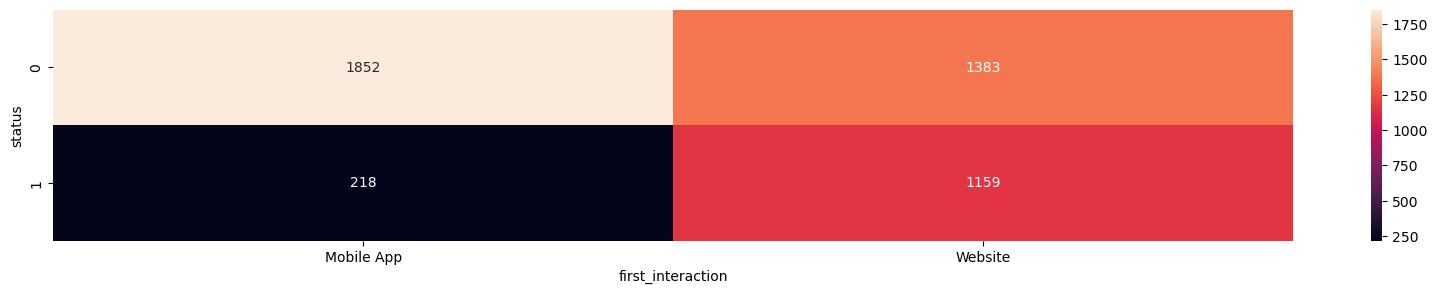

In [20]:
# Converts by first mode of interaction
plt.figure(figsize=(20,3))
sbn.heatmap(pd.crosstab(index=leadsData['status'], columns=leadsData['first_interaction']), annot=True,fmt=".5g")
plt.show()

Though leads are interacting via both mobile apps and websites, most of the converts first interacted with websites as well as % of converts are those interacting with websites are more.

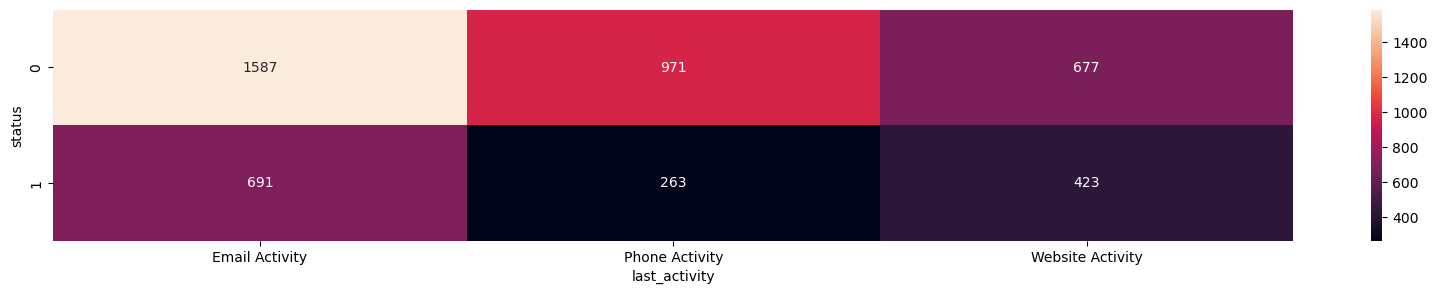

In [21]:
# Converts by last activity
plt.figure(figsize=(20,3))
sbn.heatmap(pd.crosstab(index=leadsData['status'], columns=leadsData['last_activity']), annot=True,fmt=".5g")
plt.show()

Data shows that interaction through emails followed by websites is more effecitive in converting the leads. Phone activity is least effective

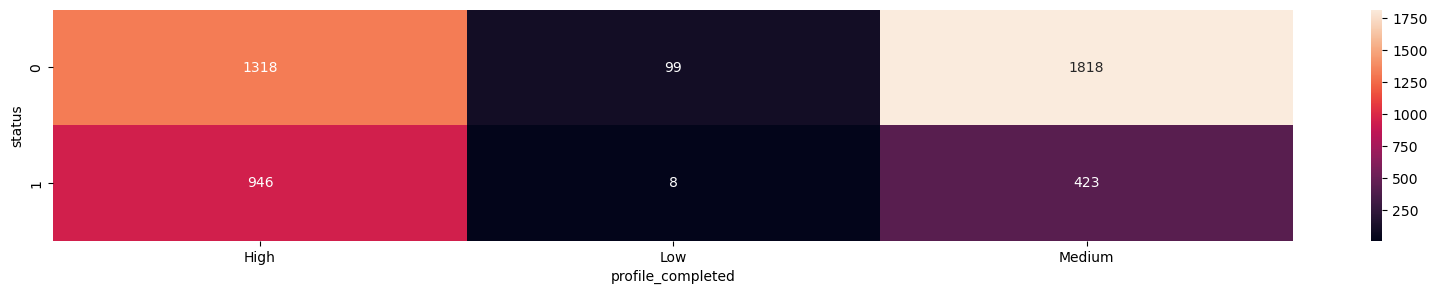

In [22]:
#Converts by profile completed
plt.figure(figsize=(20,3))
sbn.heatmap(pd.crosstab(index=leadsData['status'], columns=leadsData['profile_completed']), annot=True,fmt=".5g")
plt.show()

Though almost similar proportions of leads completed their profiles to high and medium degrees, the ones who completed to a high degree showed higher conversion rate than the medium ones. The leads who completed their profiles to a low degree,

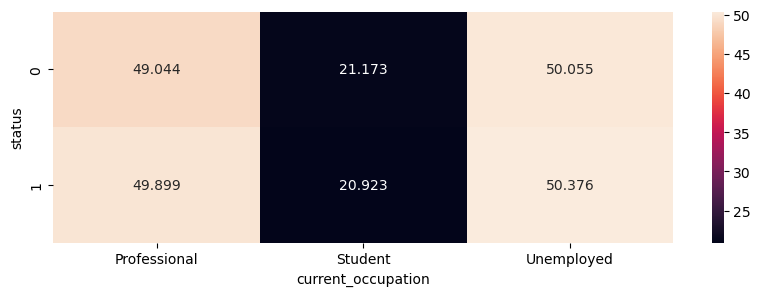

In [23]:
#Look at age of the leads by occupation
plt.figure(figsize=(10,3))
sbn.heatmap(pd.pivot_table(data=leadsData, index='status', values='age', columns='current_occupation', aggfunc='mean'), annot=True,fmt=".5g")
plt.show()

<Axes: xlabel='status', ylabel='age'>

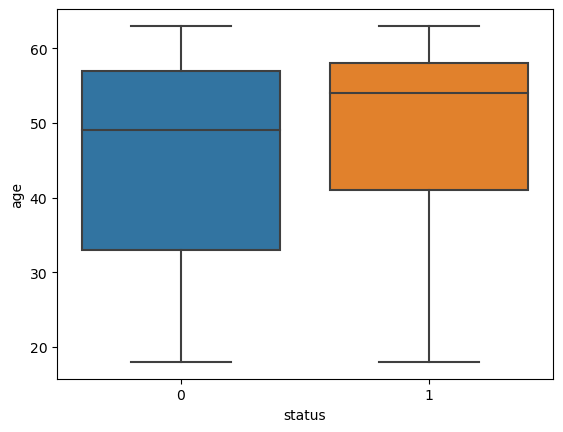

In [24]:
#Boxplot of age via status
sbn.boxplot(data=leadsData, y='age',x='status')

* Mean and median age amongst the professionals and unemployed leads is similar and around 50 yrs
* As observed from the boxplot, median age among converts and non-converts also does not vary considerably
* As expected mean age of students is much younger

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [25]:
#Get dummies for categorial variables
categoricalFeatures = pd.get_dummies(leadsData, columns=leadsData.select_dtypes(['object','category']).columns.to_list(), dtype=int, drop_first=True)

In [26]:
categoricalFeatures


,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,1,0,1,1,0,0,0,1,1,0,1,0,0
1,56,2,83,0.320,0,0,0,0,0,1,0,1,0,0,0,1,0
2,52,3,330,0.074,0,0,0,1,0,1,0,1,0,0,1,0,0
3,53,4,464,2.057,1,0,1,1,0,0,0,1,0,0,0,0,0
4,23,4,600,16.914,0,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,15,360,2.170,0,0,1,0,0,1,1,0,0,0,0,1,0
4608,55,8,2327,5.393,0,0,0,0,0,1,0,0,0,0,0,0,0
4609,58,2,212,2.692,1,0,0,1,0,0,0,0,0,0,0,0,0
4610,57,1,154,3.879,0,0,0,0,0,1,0,1,1,0,0,0,0


In [27]:
#Separate out features and the target variable
y=leadsData['status']
x=categoricalFeatures.drop(['status'],axis=1)

In [28]:
x

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,0,1,1,0,0,0,1,1,0,1,0,0
1,56,2,83,0.320,0,0,0,0,1,0,1,0,0,0,1,0
2,52,3,330,0.074,0,0,1,0,1,0,1,0,0,1,0,0
3,53,4,464,2.057,0,1,1,0,0,0,1,0,0,0,0,0
4,23,4,600,16.914,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,15,360,2.170,0,1,0,0,1,1,0,0,0,0,1,0
4608,55,8,2327,5.393,0,0,0,0,1,0,0,0,0,0,0,0
4609,58,2,212,2.692,0,0,1,0,0,0,0,0,0,0,0,0
4610,57,1,154,3.879,0,0,0,0,1,0,1,1,0,0,0,0


## Building a Decision Tree model

In [29]:
#Import model-building related libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier


In [30]:
#Split the dataset into training and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True, random_state=7)

In [31]:
x_train.shape, x_test.shape

((3689, 16), (923, 16))

In [32]:
#Get the proportion of the outputs/target
y.value_counts(1)

status
0    0.701431
1    0.298569
Name: proportion, dtype: float64

The dataset is kind of imbalanced and biased towards value 0 i.e. predicting a lead to not convert. The decision tree can be balanced by providing weights in the decision tree

In [33]:
#Create weights for the target
weights ={0:0.701, 1:0.298}

In [34]:
#Build and fit a decision tree classifier
leads_Classifier=DecisionTreeClassifier(class_weight=weights, random_state=7)
leads_Classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.701, 1: 0.298}, random_state=7)

In [35]:
#Predict using decision tress on train and test data
y_train_predict_dt=leads_Classifier.predict(x_train)
y_test_predict_dt=leads_Classifier.predict(x_test)

## Model Performance evaluation and improvement

In [36]:
#Import model metrics from ski-kit learn
from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score, recall_score, confusion_matrix, classification_report, make_scorer

In [37]:
#Define a function to get consolidated model metrics
def model_performance(trueValues,predictionValues,):
  print(classification_report(trueValues, predictionValues))
  plt.figure(figsize=(10,3))
  sbn.heatmap(confusion_matrix(trueValues, predictionValues), annot=True, fmt='0.2f', xticklabels=['Non-Convert','Convert'], yticklabels=['Non-Convert','Convert'])
  plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2587
           1       1.00      1.00      1.00      1102

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



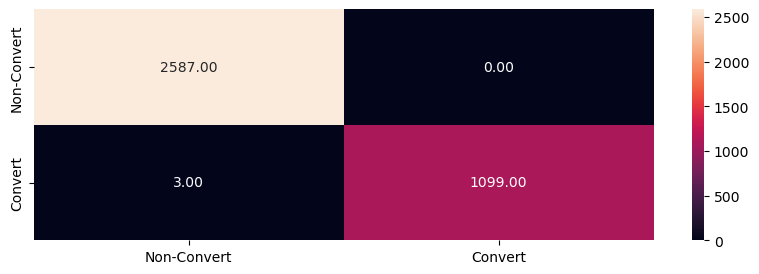

In [38]:
#Model performance on training data
model_performance(y_train,y_train_predict_dt,)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       648
           1       0.69      0.75      0.71       275

    accuracy                           0.82       923
   macro avg       0.79      0.80      0.79       923
weighted avg       0.83      0.82      0.82       923



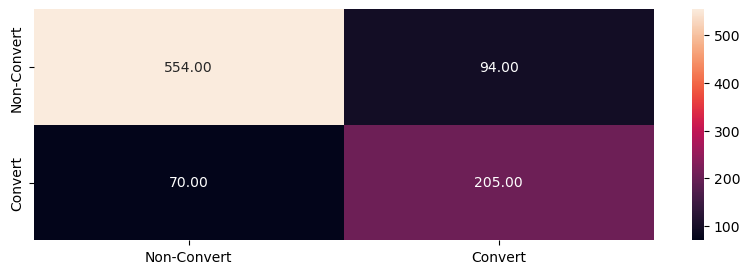

In [39]:
#Model performance on testing data
model_performance(y_test,y_test_predict_dt)

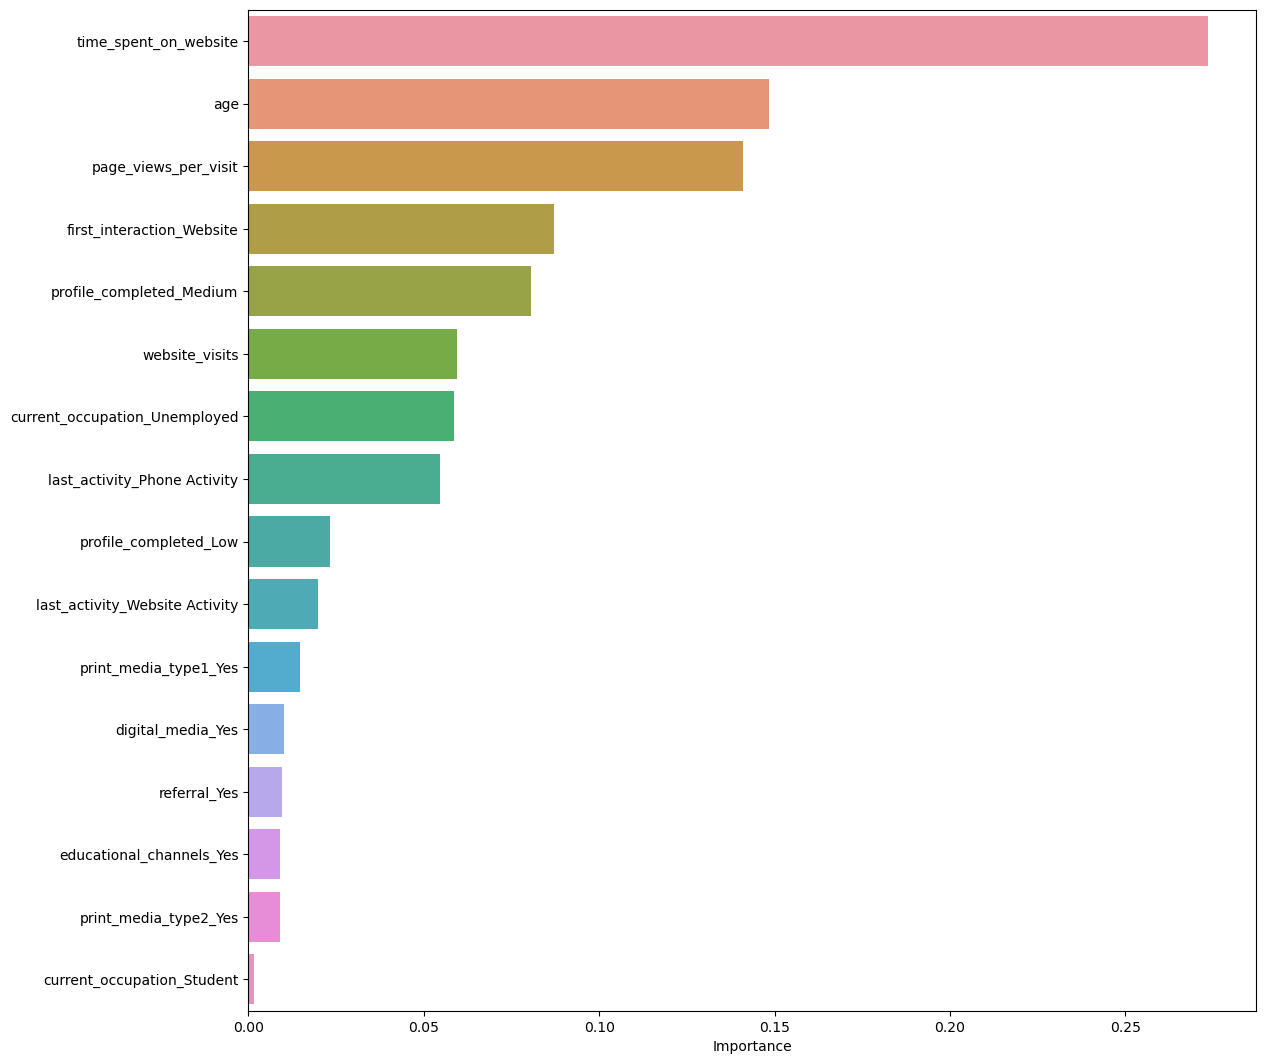

In [40]:
# Plot the feature importance
importances = leads_Classifier.feature_importances_
columns = x.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sbn.barplot(x=importance_df.Importance,y=importance_df.index);

####Basic Decision Tree

* The basic decision tree gives perfect precision and recall on training data but lower metrics on the test data, implying its overfitting the training data  
* The basic decision tree model gives time spent on website followed by age and page views per visit as the 3 most important predictors of the final status of the leads. This is consistent with the **correlation** of 'status' observed with these predictors in the heatmap above
*  The 'Important Features' barplot also shows top 3 predictors are continuous numerical features.
* Some of the categorical features like print media type 1 & 2, digital media, educational channel and referrals have less predictive power.



####Tuning Basic Decision Tree
Using GridSearch to tune the tree hyperparameters.

In [41]:
#Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [42]:
#Create decision tree
leads_Classifier=DecisionTreeClassifier(class_weight=weights, random_state=7)

#Create dictionary of parameters
dt_params = {'max_depth': np.arange(2,7), 'min_samples_leaf':[10,15,20,25], 'criterion':["gini","entropy"]}

#Scorer for decision trees
scorer=make_scorer(recall_score)

#Create Grid Search
tuned_classifier=GridSearchCV(leads_Classifier,dt_params,scoring=scorer, cv=10)

In [43]:
#Fit different models using training data
tuned_classifier.fit(x_train, y_train)

#Get the best model
tuned_dt=tuned_classifier.best_estimator_


In [44]:
#Fit the tuned decision tree on the training data
tuned_dt.fit(x_train, y_train)

#Prediction using tuned decision tree
y_train_predict_tunedDT = tuned_dt.predict(x_train)
y_test_predict_tunedDT=tuned_dt.predict(x_test)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2587
           1       0.91      0.47      0.62      1102

    accuracy                           0.83      3689
   macro avg       0.86      0.72      0.75      3689
weighted avg       0.84      0.83      0.81      3689



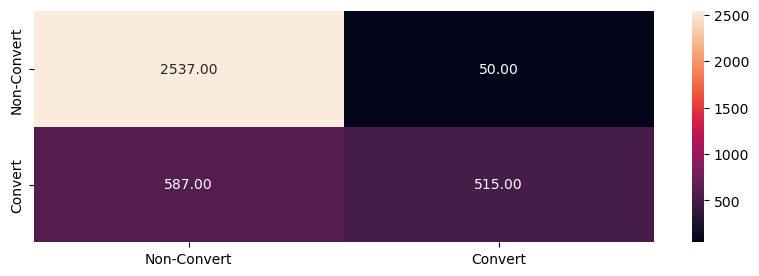

In [45]:
#Check the performance on training data
model_performance(y_train, y_train_predict_tunedDT)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       648
           1       0.86      0.50      0.63       275

    accuracy                           0.83       923
   macro avg       0.84      0.73      0.76       923
weighted avg       0.83      0.83      0.81       923



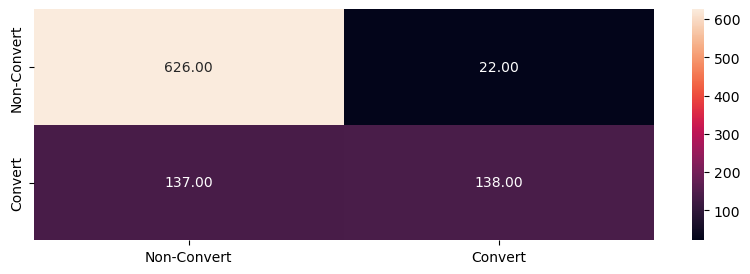

In [46]:
#Check the performance on test data
model_performance(y_test, y_test_predict_tunedDT)

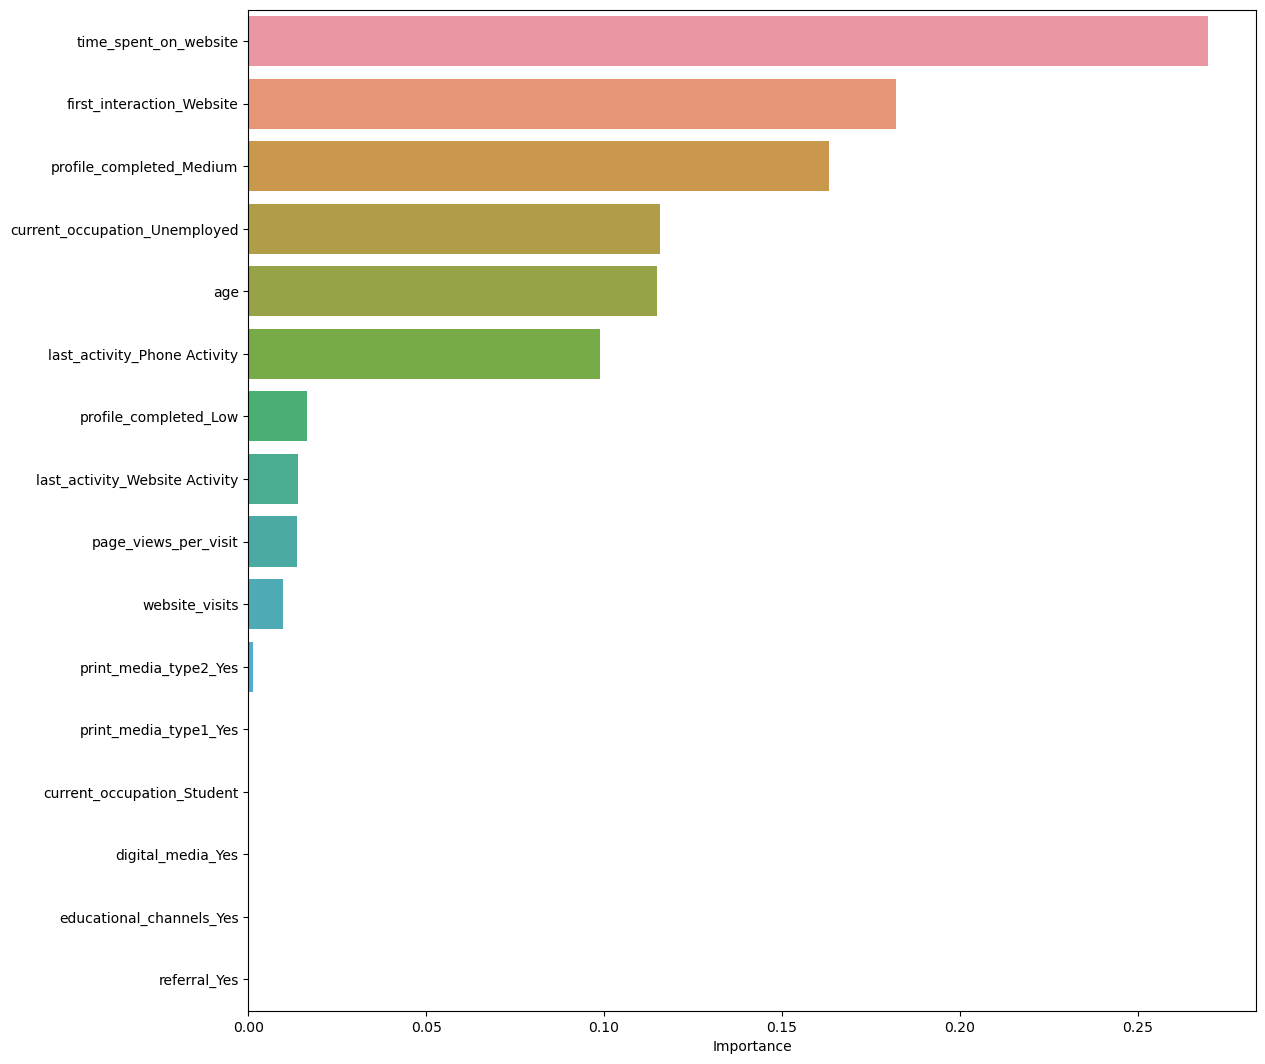

In [47]:
# Plot the feature importance using tuned decision tree
importances = tuned_dt.feature_importances_
columns = x.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sbn.barplot(x=importance_df.Importance,y=importance_df.index);

##Observations from Tuned Decision Tree
*   Tuned Decision tree does not overfit the model, as precision and recall amongst the training and test data is similar and does not vary by a large percentage.
*   Precision is still high in both training and test data, however recall has substantially gone down compared to the base decision tree
*  A lower recall means there are potential leads that would convert but not predicted by the model. Though overall, its a good outcome for ExtraaLearn but not able to predict the potential converts, means ExtraaLearn would miss spending time and resources on these leads who are likely to convert.
* Most important predictors in the tuned model are time spent by leads on the website followed by how they first interacted and level of profile completion.  
*  There are more model improvements that can be done to get a better recall. Next, random forest model can be explored to see if a better recall can be achieved


## Building a Random Forest model

In [48]:
#Create a basic Random Forest classifier
leads_rf_classifier= RandomForestClassifier(class_weight=weights, random_state=7)

#Fit the training data using random forest
leads_rf_classifier.fit(x_train, y_train)

#Predict on train and test data using random forest
y_train_predict_rf=leads_rf_classifier.predict(x_train)
y_test_predict_rf= leads_rf_classifier.predict(x_test)

## Model Performance evaluation and improvement

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2587
           1       1.00      1.00      1.00      1102

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



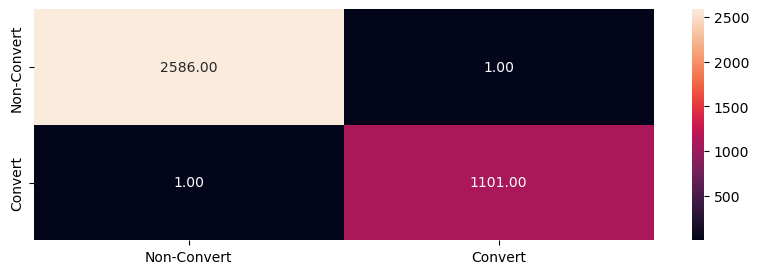

In [49]:
#Test the basic random forest performance on train data
model_performance(y_train, y_train_predict_rf)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       648
           1       0.78      0.75      0.76       275

    accuracy                           0.86       923
   macro avg       0.84      0.83      0.83       923
weighted avg       0.86      0.86      0.86       923



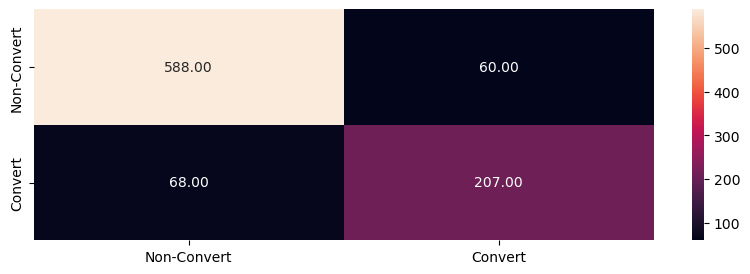

In [50]:
model_performance(y_test, y_test_predict_rf)

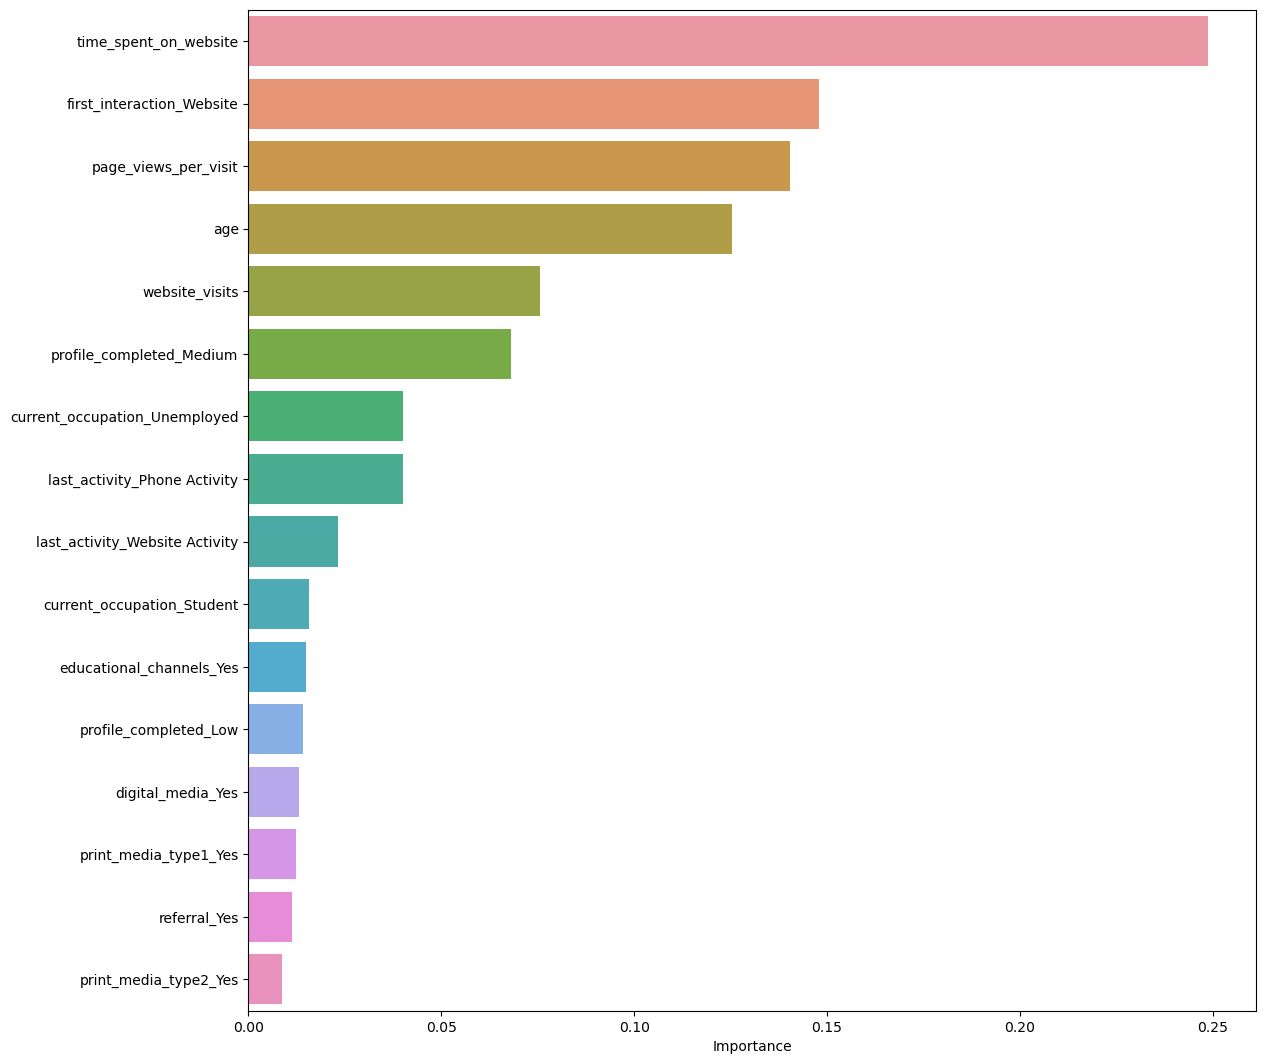

In [51]:
#Get the importance of features using base random forest
importances = leads_rf_classifier.feature_importances_
columns = x.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sbn.barplot(x=importance_df.Importance,y=importance_df.index);

### Base Random Forest Performance
*   Similar to Base Decision Tree, base random forest model **overfits** the training data giving perfect precision and recall. However, precison and recall goes down with the test data
*   The important features from base random forest are more similar to features from tuned decision tree. The 2 most important predictors in both the models are time spent on website and first interaction with website
* The numer of page views was one of the important features (top 3) in base decision tree and thats also the case for base random forest, consistent with empirical correlation between 'page views' and 'status' in the dataset. However, it didnt have much contribution in the tuned decision tree. It remains to be seen if this would be an important factor in the tuned random forest.



####Tuning Basic Random Forest
Using GridSearch to tune the random forest hyperparameters.

In [52]:
#Create a base random forest classifier
leads_rf_classifier2 = RandomForestClassifier(class_weight=weights, random_state=7)

#create a dictionary of hyperparameters to be tuned
rf_params = {'n_estimators': [100,250,500],'criterion': ["gini","entropy"], 'min_samples_leaf': [1,2,4], "max_features": [0.7, 0.9, 'auto']}

#create GridSearchCV
rf_tuned_cv=GridSearchCV(leads_rf_classifier2,rf_params, scoring=scorer, cv=10)


In [53]:
#Fit using the tuned cv
rf_tuned_cv.fit(x_train, y_train);

#Get the best random forest using the tuned hyperparameters
rf_tuned= rf_tuned_cv.best_estimator_

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2587
           1       1.00      1.00      1.00      1102

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



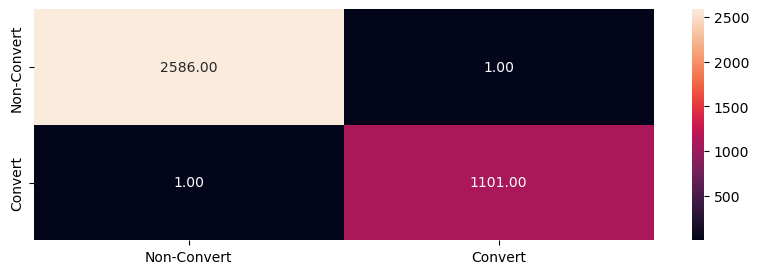

In [54]:
#Check the performance on the training data
rf_tuned.fit(x_train, y_train)

y_train_predict_tunedRF= rf_tuned.predict(x_train)
y_test_predict_tunedRF=  rf_tuned.predict(x_test)

model_performance(y_train,y_train_predict_tunedRF)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       648
           1       0.75      0.78      0.77       275

    accuracy                           0.86       923
   macro avg       0.83      0.84      0.83       923
weighted avg       0.86      0.86      0.86       923



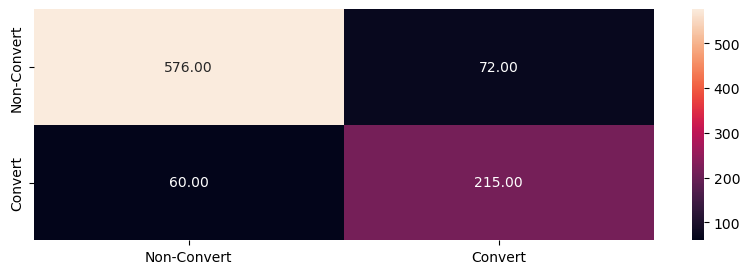

In [55]:
#Check the performance on the test data
model_performance(y_test,y_test_predict_tunedRF)

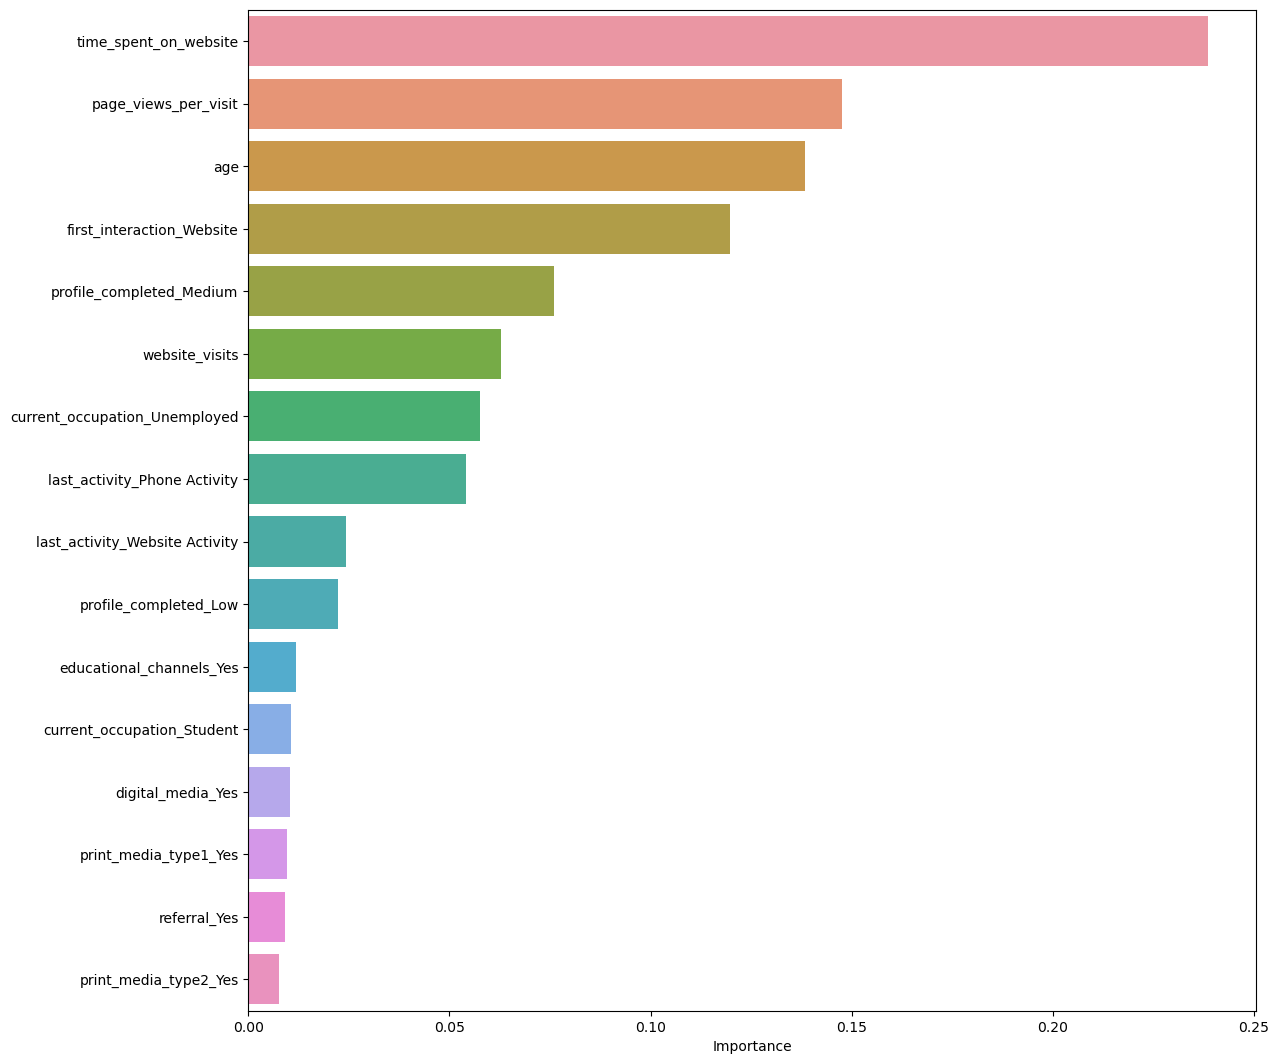

In [56]:
#Get the importance of features using tuned random forest
importances = rf_tuned.feature_importances_
columns = x.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sbn.barplot(x=importance_df.Importance,y=importance_df.index);

### Tuned Random Forest Performance
*  Tuned Random Forest is very similar to the base random forest, it overfits the training data but gives only a better recall than the base random forest by 3%
* The most important feature continues to be the time spent on website. However, tuned random forest has age being more important than the first mode of interaction with the website.




### Summary of all models

In [57]:
#Get a comparison of recall score on test data amongst all the models
rs_dt=recall_score(y_test, y_test_predict_dt)
rs_tunedDT=recall_score(y_test, y_test_predict_tunedDT)
rs_rf=recall_score(y_test, y_test_predict_rf)
rs_tunedRF=recall_score(y_test, y_test_predict_tunedRF)

#Create a final dataframe from all the recall scores
rs_comparison= pd.DataFrame([rs_dt, rs_tunedDT, rs_rf, rs_tunedRF], index=['Base Decision Tree', 'Tuned Decision Tree', 'Base Random Forest', 'Tuned Random Forest'], columns=['Test Recall Score'])
print(rs_comparison)


                     Test Recall Score
Base Decision Tree            0.745455
Tuned Decision Tree           0.501818
Base Random Forest            0.752727
Tuned Random Forest           0.781818


##Modeling Conclusion
Since the main goal of ExtraaLearn is to maximize the recall score, it seems like tuned random forest would be the best option. The recall score for base decision tree and base random forest are in similar range and would be **2nd best model** after tuned random forest.

## Actionable Insights and Recommendations



*   Insight: Time spent on the website is the most important feature in determining the convert status for a lead. Leads who spend more time on website are likely to convert. \\
Recommendation: It is recommended for Extraalearn to establish a threshold here and engage with leads who spend more time on their websites.
* Insight: Though a significant number of leads (~40%) first interact with mobile app, a lead is more likely to convert if the first interaction is through website. \\
Recommendation: Employ more support staff in engaging leads on website than mobile app. At the same time, ExtraaLearn should investigate and survey the functionality and user experience on mobile app and accordingly, spent some resources in improving the mobile app experience
* Insight : Number of pages views per visit is also one of the important factors impacting the final status of a lead. If a lead is going through more pages in a visit, it could imply the lead is more serious in pursuing a course on ExtraaLearn and thats why trying to find more details about the courses. Similar obervation also implies to number of website visits and level of profile completed. \\
Recommendation: It is similar to time spent on website. In general, leads spending more time on website or viewing more pages in a visit or high number of website visits, should be taken as leads likely to convert and ExtraaLearn can allocate its resources and staff efficiently in engaging with those leads further.
* Insight: It is observed that conversing through email is more effective in converting leads. \\
Recommendation : Once leads have been identified throught other features like time spent on website, website visits, page views etc., ExtraaLearn should continue engaging with those leads through email followed by phone. Since email medium is showing up as an effective means of communication, ExtraaLearn can also explore live chat and other messaging apps like Whatasapp as alternatives to emails and phone
* Insight: From the empirical bivariate analysis as well through decision tree and random forest models, age is showing up as one of the leading features. It makes sense as older individuals would have savings to afford ExtraaLearn courses than students.\\
Recommendation: Since older professionals or older unemployed are more likely to pursue a course on ExtraaLearn, ExtraLearn can offer courses appealing to those leads and perhaps, create more practical and industry oriented courses to provide incentives to such clients to finally convert. At the same time, ExtraaLearn can explore alternative ways to engage students by perhaps offering other kinds of discounted courses that could be taught by teaching or research assistants while professors can teach the older leads
* Insight: From the empirical dataset, it is observed that majority of the leads (almost ~90%) of the leads didn't see the ads of ExtraaLearn on either print media, digital media or educational channels. \\
Recommendation: ExtraaLearn is recommended to spend more on marketing team as well as the quality of its ads, as either number or quality of its ads has not proven effective in reaching its customer base.




